In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

import helper as h
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

pio.renderers.default = 'iframe'

pio.templates['ck_template'] = go.layout.Template(
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font=dict(family='Calibri Light'),
    layout_title_font = dict(family='Calibri'),
    layout_hoverlabel_font = dict(family='Calibri Light')
)

pio.templates.default = 'ck_template+gridon'

In [2]:
#import necessary packages
import numpy as np
import pandas as pd

train_in_file = 'C:/Users/24307/Downloads/Kaggle/train.csv'
test_in_file = 'C:/Users/24307/Downloads/Kaggle/test.csv'
data = pd.read_csv(train_in_file)
test = pd.read_csv(test_in_file)

test_for_boost = test

In [3]:
data, test = h.fit_generator(data, test)

In [4]:
data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8693,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6643,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,8641_01,Earth,False,F/1194/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Asch Stradick,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [5]:
# looks like age<17 are unlikely to be VIPs, but that yields to nothing valuable as we classify most of nans in VIP as False
import plotly.express as px
df = data.loc[(data.Age.isnull() == False)&(data.VIP.isnull() == False)]
fig = px.histogram(df, x='Age', color='VIP')
fig.show()

In [6]:
# children <= 12 years old are barred from consumption
import plotly.express as px
data, test = h.preprocess_add_features(data, test)
df = data.loc[(data.Age.isnull() == False)&(data.TotalSpended.isnull() == False)]
fig = px.histogram(df, x='Age', color='TotalSpended')
fig.show()

In [7]:
# The accumulative values suits bell curve. Why not propagating the nans with neighboring values?
import plotly.express as px
import plotly.graph_objects as go

df = data.groupby('Age').sum().reset_index()

x0 = df.RoomService
x1 = df.FoodCourt
x2 = df.ShoppingMall
x3 = df.Spa
x4 = df.VRDeck
x5 = df.TotalSpended

fig = go.Figure()
fig.add_trace(go.Line(y=x0, name='RoomService'))
fig.add_trace(go.Line(y=x1, name='FoodCourt'))
fig.add_trace(go.Line(y=x2, name='ShoppingMall'))
fig.add_trace(go.Line(y=x3, name='Spa'))
fig.add_trace(go.Line(y=x4, name='VRDeck'))
fig.add_trace(go.Line(y=x5, name='TotalSpended'))

fig.show()

In [8]:
df2 = data.loc[(data.Age.isnull() == False)&(data.TotalSpended.isnull() == True)]
df2.fillna(method='bfill', inplace=True)
df2 = df2.iloc[:-1, :]
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,B,C
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,NaN,0006,02,2,0,0,G,0,S
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Altardr Flatic,True,NaN,0008,02,3,0,0,B,1,P
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,0.0,0.0,0.0,Flats Eccle,False,NaN,0014,01,1,1,0,F,3,P
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,Mollen Mcfaddennon,False,NaN,0020,03,6,0,0,E,0,S
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,0.0,0.0,0.0,0.0,0.0,Mael Brantuarez,False,NaN,0020,05,6,0,0,E,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,9220_03,Earth,False,F/1886/P,PSO J318.5-22,22.0,False,623.0,0.0,0.0,0.0,53.0,Kennie Barrilloney,True,NaN,9220,03,3,0,0,F,1886,P
8642,9221_01,Earth,True,G/1497/P,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Elicey Beachez,False,NaN,9221,01,1,1,0,G,1497,P
8643,9222_01,Mars,True,F/1784/S,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,0.0,0.0,Carves Chate,True,NaN,9222,01,1,1,0,F,1784,S
8665,9247_01,Earth,True,G/1491/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,188.0,Phia Cleang,False,NaN,9247,01,1,1,0,G,1491,S


In [9]:
# check sample results
df2 = df2.groupby('Age').sum().reset_index()

x0 = df2.RoomService
x1 = df2.FoodCourt
x2 = df2.ShoppingMall
x3 = df2.Spa
x4 = df2.VRDeck

fig = go.Figure()
fig.add_trace(go.Line(y=x0, name='RoomService'))
fig.add_trace(go.Line(y=x1, name='FoodCourt'))
fig.add_trace(go.Line(y=x2, name='ShoppingMall'))
fig.add_trace(go.Line(y=x3, name='Spa'))
fig.add_trace(go.Line(y=x4, name='VRDeck'))

fig.show()

In [10]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,B,C
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,01,1,1,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,01,1,1,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,01,2,0,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,02,2,0,1,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,01,1,1,1,F,1,S


In [11]:
#fill missing CryoSleep data with True for those not spending any money
#fill missing spenditure data of kids less than 12 with zero spending
data.loc[(data['CryoSleep'].isnull()) 
         & (data['TotalSpended'] <= 0), 'CryoSleep'] = True
test.loc[(test['CryoSleep'].isnull()) 
         & (test['TotalSpended'] <= 0), 'CryoSleep'] = True

data.loc[(data['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (data['Age'] <= 12), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0
test.loc[(test['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (test['Age'] <= 12), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0

In [12]:
#fill nan with neareast numbers
data = data.fillna(method='bfill')
test = test.fillna(method='bfill')

In [13]:
#check decretized candidate data
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [14]:
#looking for an appropriate option for missing values
from IPython.display import display
display(data.groupby('HomePlanet').count())
display(data.groupby('Destination').count())

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,B,C
HomePlanet,,,,,,,,,,,,,,,,,,,,,,
Earth,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697
Europa,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
Mars,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812,1812


,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,B,C
Destination,,,,,,,,,,,,,,,,,,,,,,
55 Cancri e,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
PSO J318.5-22,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816,816
TRAPPIST-1e,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041,6041


In [15]:
#fill nans with mode
data.HomePlanet.fillna('Earth', inplace=True)
data.Destination.fillna('TRAPPIST-1e', inplace=True)

test.HomePlanet.fillna('Earth', inplace=True)
test.Destination.fillna('TRAPPIST-1e', inplace=True)

In [16]:
#check result
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [17]:
#zoom in to see cabin
len(data.Cabin.unique()), len(data.Cabin.unique()) == len(data)

(6643, False)

In [18]:
#check mode
display(data.groupby('A').count())
display(data.groupby('B').count())
display(data.groupby('C').count())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,B,C
A,,,,,,,,,,,,,,,,,,,,,,
A,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262
B,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804
C,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770
D,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498
E,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895,895
F,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840
G,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619,2619
T,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,C
B,,,,,,,,,,,,,,,,,,,,,,
0,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
100,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1000,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
996,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
997,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,B
C,,,,,,,,,,,,,,,,,,,,,,
P,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300,4300
S,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393


In [19]:
#fill nan with mode
data.A.fillna('F', inplace=True)
data.B.fillna(0, inplace=True)
data.C.fillna('S', inplace=True)

test.A.fillna('F', inplace=True)
test.B.fillna(0, inplace=True)
test.C.fillna('S', inplace=True)

In [20]:
#check results
print(data.A.unique(), data.B.unique(), data.C.unique())

['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] ['0' '1' '2' ... '1892' '1893' '1894'] ['P' 'S']


In [21]:
#view data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpended,id,num,cum,Status,Consumption,A,B,C
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,01,1,1,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,01,1,1,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,01,2,0,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,02,2,0,1,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,01,1,1,1,F,1,S


In [22]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpended', 'id', 'num', 'cum', 'Status',
       'Consumption', 'A', 'B', 'C'],
      dtype='object')

In [23]:
#get necessary columns
labels = data.Transported
data = data[['HomePlanet', 'CryoSleep', 'Destination', 'Age','Consumption',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpended',
        'A', 'B', 'C']]

test = test[['HomePlanet', 'CryoSleep', 'Destination', 'Age','Consumption',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpended',
        'A', 'B', 'C']]

In [24]:
#view data
display(data)

,HomePlanet,CryoSleep,Destination,Age,Consumption,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpended,A,B,C
0,Europa,False,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,736.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,5176.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,1091.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,1,0.0,0.0,1872.0,1.0,0.0,1873.0,G,1500,S
8691,Europa,False,55 Cancri e,32.0,1,0.0,1049.0,0.0,353.0,3235.0,4637.0,E,608,S


In [25]:
len(data.A.unique())

8

In [26]:
data.B = data.B.astype('int')
test.B = test.B.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   Consumption   8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  TotalSpended  8693 non-null   float64
 11  A             8693 non-null   object 
 12  B             8693 non-null   int32  
 13  C             8693 non-null   object 
dtypes: bool(1), float64(7), int32(1), int64(1), object(4)
memory usage: 925.3+ KB


In [27]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [28]:
data.columns

Index(['CryoSleep', 'Age', 'Consumption', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpended', 'B',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'A_A', 'A_B', 'A_C', 'A_D', 'A_E', 'A_F',
       'A_G', 'A_T', 'C_P', 'C_S'],
      dtype='object')

In [29]:
#ready for preprocessing
data = data.astype('int')
test = test.astype('int')

In [30]:
#start preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(data)
test = scaler.fit_transform(test)

In [31]:
X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)

It seems to be a binary classified structure, vaguely separated by the the middle blue line.

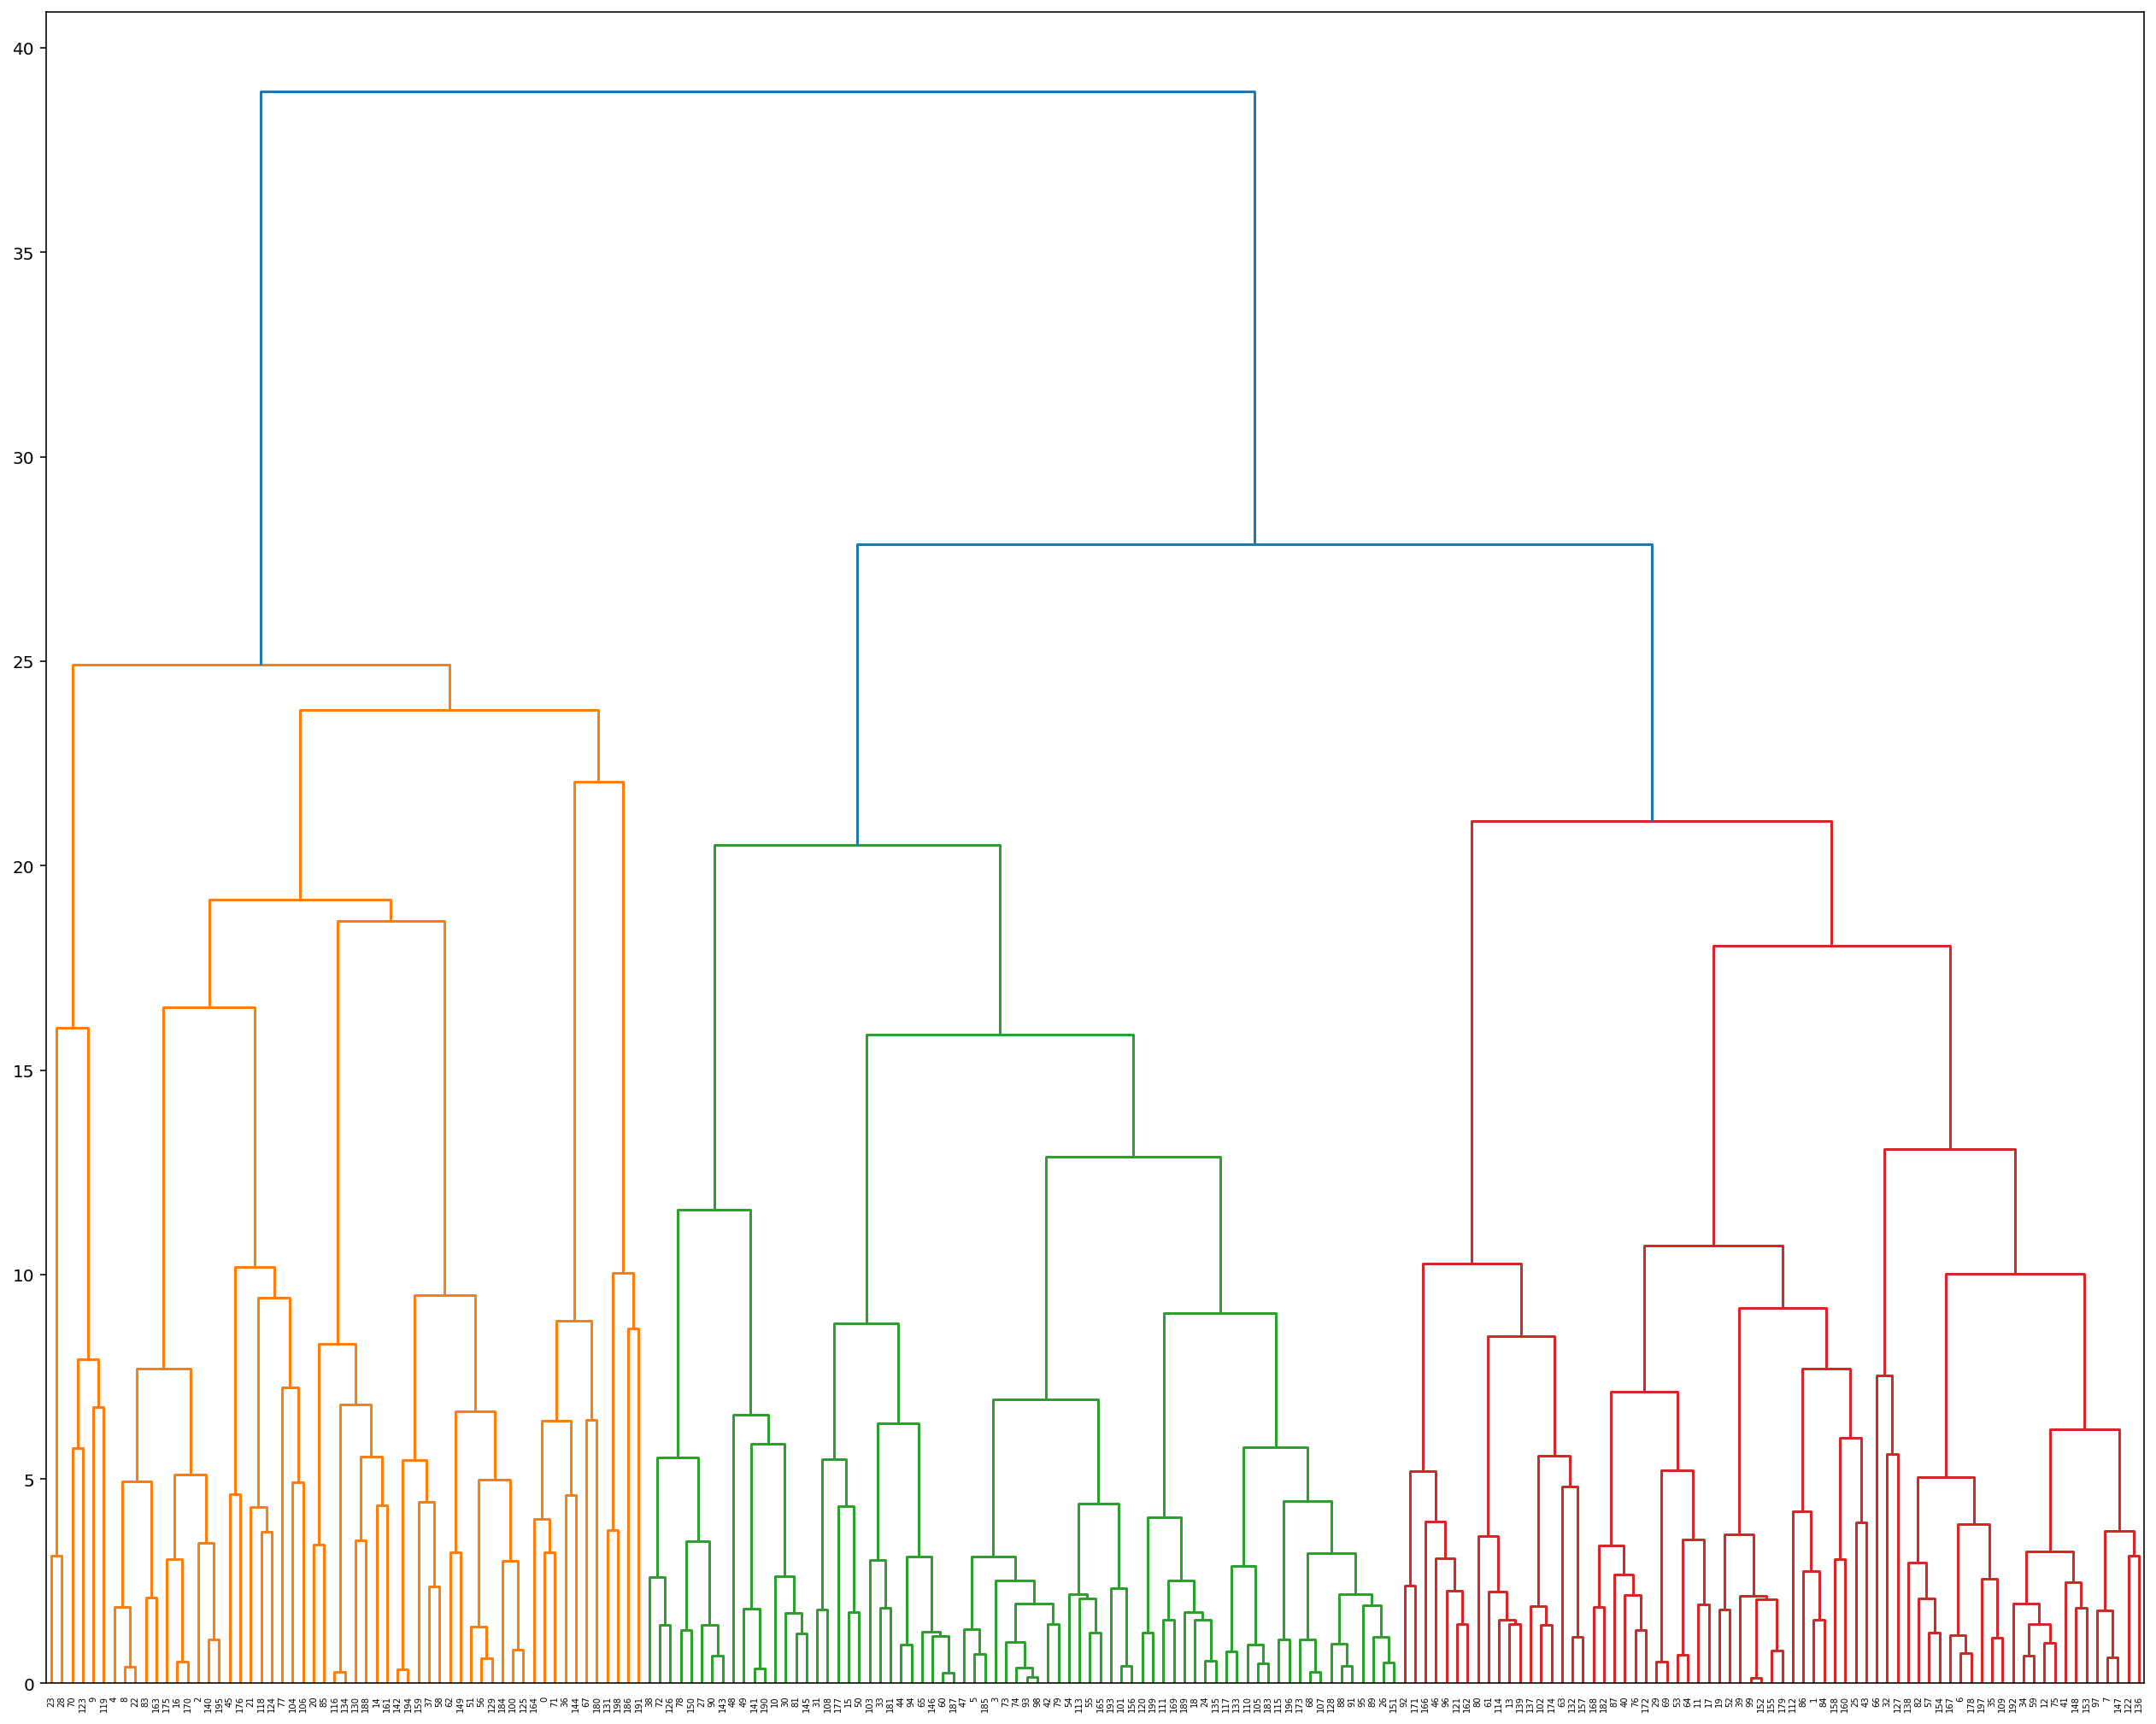

In [32]:
#using hierachical clustering to understand data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 18))
linkage_type = 'ward'
linkage_matrix = linkage(X_train[:200, :], linkage_type)
dendrogram(linkage_matrix)
plt.show()

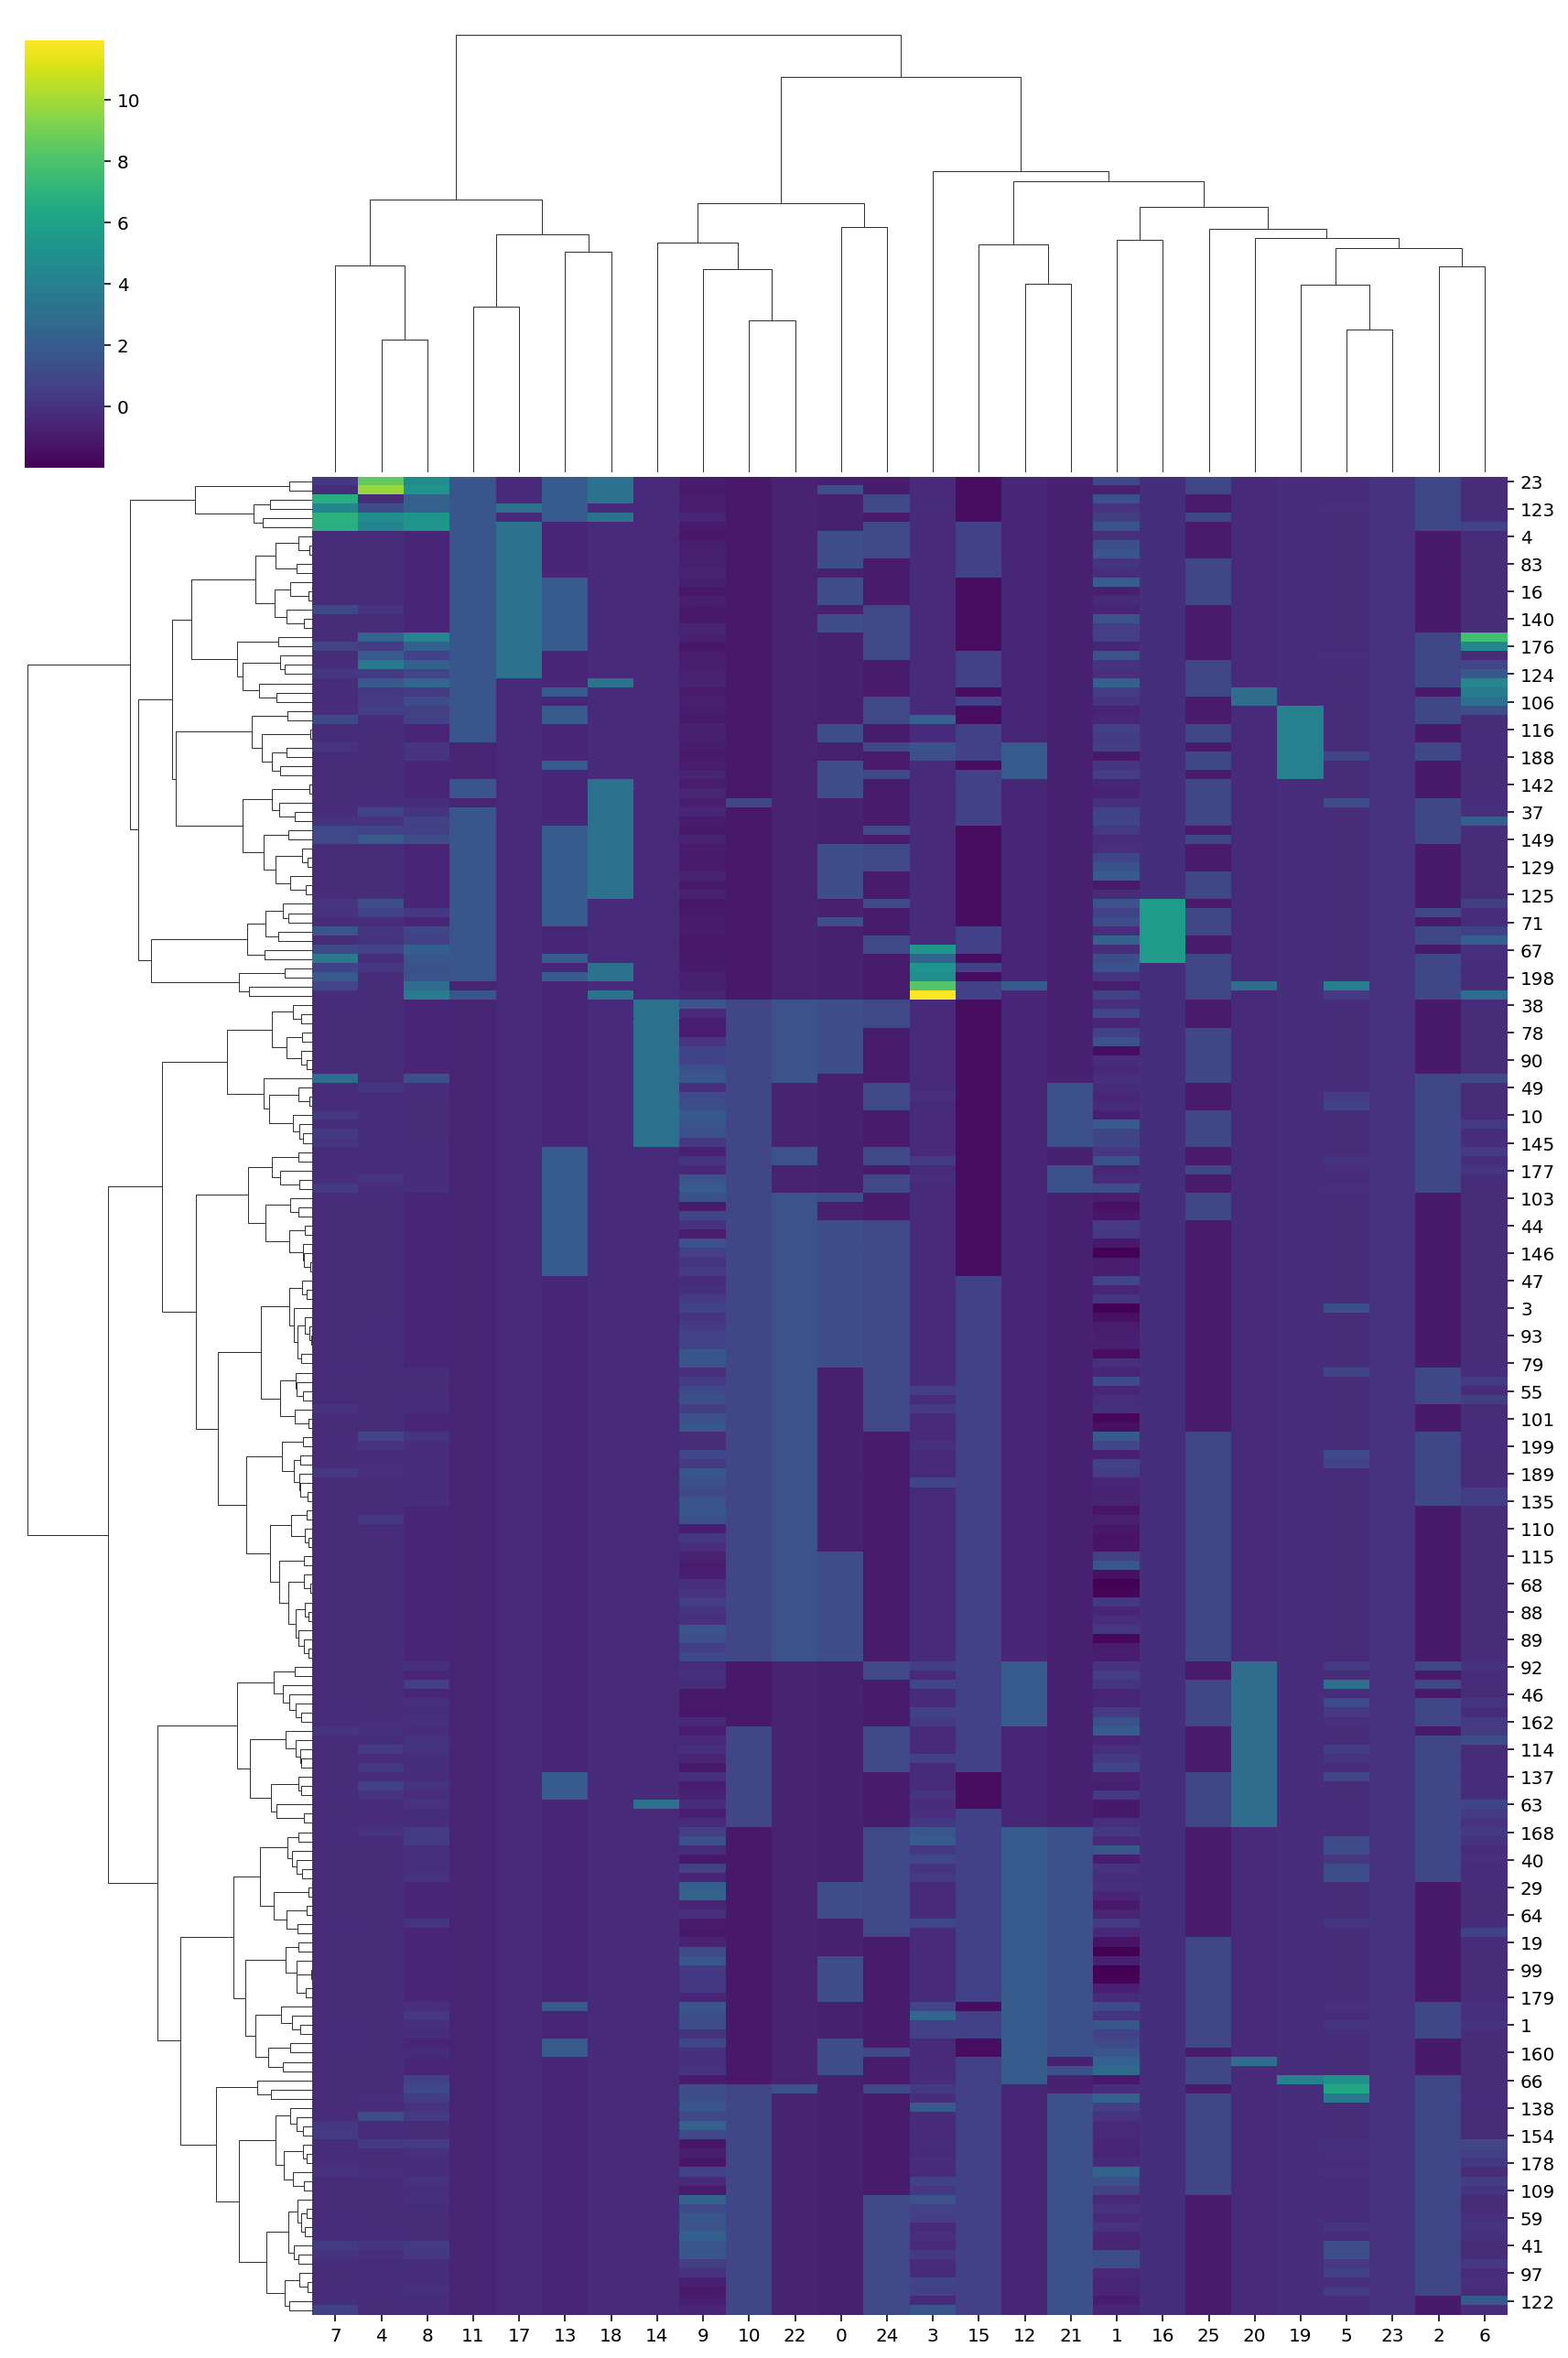

In [33]:
#using seaborn to see clearer
import seaborn as sns

sns.clustermap(X_train[:200, :], figsize=(12, 18), method=linkage_type, cmap='viridis')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

complete = AgglomerativeClustering(n_clusters=200, linkage='complete')
complete_pred = complete.fit_predict(X_train)

average = AgglomerativeClustering(n_clusters=200, linkage='average')
average_pred = average.fit_predict(X_train)

ward = AgglomerativeClustering(n_clusters=200)
ward_pred = ward.fit_predict(X_train)

complete_score = adjusted_rand_score(X_test.astype('int'), complete_pred)
average_score = adjusted_rand_score(X_test.astype('int'), average_pred)
ward_score = adjusted_rand_score(X_test.astype('int'), ward_pred)

print('Scores: \nWard:', ward_score, '\nAverage:', average_score, '\nComplete:', complete_score)

Scores: 
Ward: 0.005705658970383558 
Average: 0.021054216830455996 
Complete: 0.011750271272083616


Text(0.5, 1.0, 'Scree Plot')

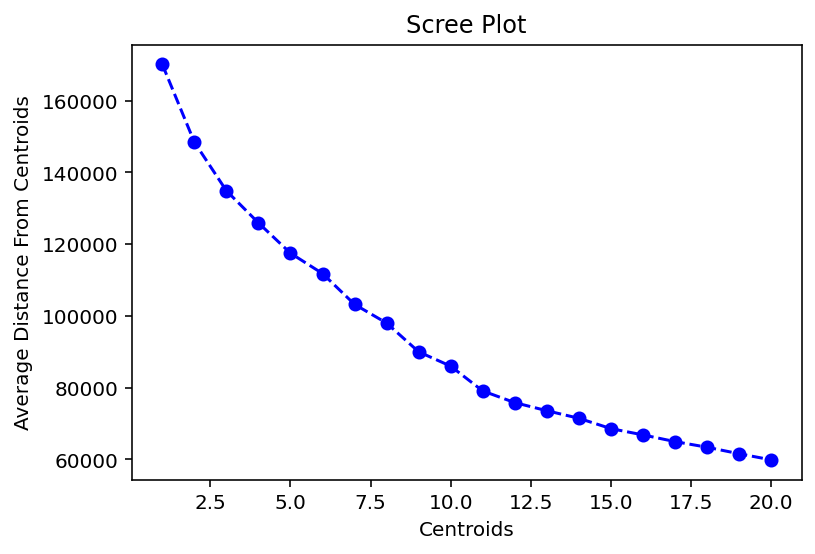

In [35]:
from sklearn.cluster import KMeans

def k_fit(k):
    scores = []
    for _ in range(1, k+1):
        kmeans_k = KMeans(_)
        kmeans_k.fit(X_train)
        scores.append(abs(kmeans_k.score(X_train)))
    return scores

k=20
scores = k_fit(k)
plt.plot(range(1,k+1), scores, '--', marker='o', color='b')
plt.xlabel('Centroids')
plt.ylabel('Average Distance From Centroids')
plt.title('Scree Plot')

The reason why unsupervised learning is unable to converge to a certain point possibly is passengers boarding Titanic generally follows a similar pattern of behavior, unlike viridis, which varies in accordance with different species.

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_list = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=200, min_samples_leaf=3)
            model.fit(X_train, X_test)
            prediction = model.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=200)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_train)
            score = accuracy_score(prediction, y_test)
            model = ada
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=200)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_train)
            score = accuracy_score(prediction, y_test)
            model = tree
            print(model, score)
        model_list.append(model)
    return model_list
            
results = train([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_train,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200) 0.8026678932842686
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                         min_samples_leaf=3),
                   n_estimators=200) 0.7847286108555658
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200) 0.8008279668813247
DecisionTreeClassifier(max_depth=200, min_samples_leaf=3) 0.7594296228150874


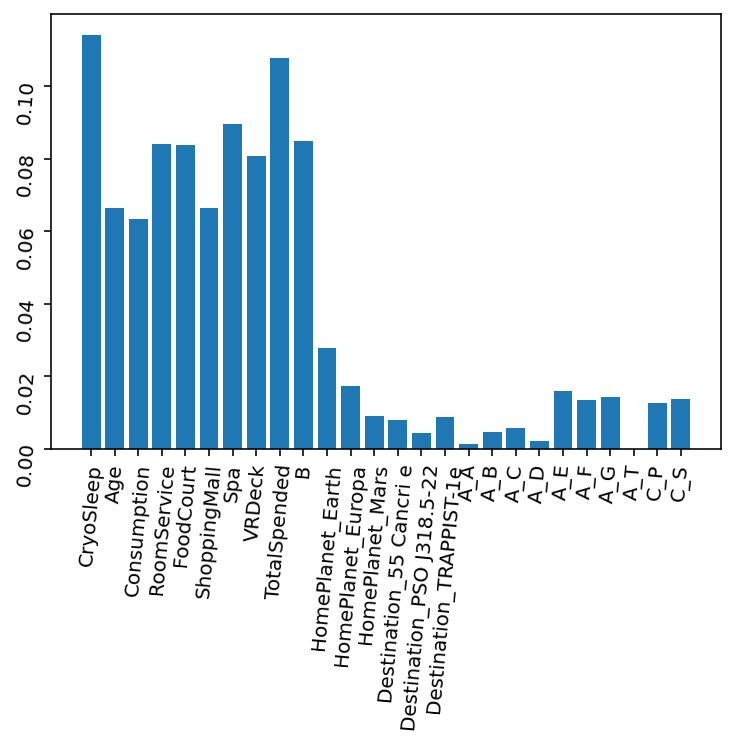

In [37]:
# Use Random Forest to observe feature importance
plt.bar(x=range(len(data.columns)), height=results[0].feature_importances_)
plt.xticks(ticks=range(len(data.columns)), labels=data.columns)
plt.tick_params(labelrotation=85)
plt.show()

In [38]:
# We could try adding clustered labels into data to see if that helps improvement
ward = AgglomerativeClustering(n_clusters=10)
X_ward_pred = ward.fit_predict(X_train)
X_ward_pred = scaler.fit_transform(X_ward_pred.reshape(-1,1))
X_added = np.hstack((X_train, ward_pred.reshape(-1,1)))


y_ward_pred = ward.fit_predict(y_train)
y_ward_pred = scaler.fit_transform(y_ward_pred.reshape(-1,1))
y_added = np.hstack((y_train, y_ward_pred.reshape(-1,1)))


t_added = ward.fit_predict(test)
t_added = scaler.fit_transform(t_added.reshape(-1,1))
t_added = np.hstack((test, t_added.reshape(-1,1)))


def train2(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_list = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=200, min_samples_leaf=3, min_samples_split=2)
            model.fit(X_train, X_test)
            prediction = model.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=200)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_added)
            score = accuracy_score(prediction, y_test)
            model = ada
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=200)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_added)
            score = accuracy_score(prediction, y_test)
            model = tree
            print(model, score)
        model_list.append(model)
    return model_list
results2 = train2([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_added,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200) 0.8091076356945722
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                         min_samples_leaf=3),
                   n_estimators=200) 0.6674333026678932
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200) 0.7994480220791168
DecisionTreeClassifier(max_depth=200, min_samples_leaf=3) 0.7493100275988961


looks clustered labels are more effective

In [39]:
#Use grid search to find best parameters
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
parameters = {'n_estimators':[100, 150, 200],
              'min_samples_leaf': [3, 5, 7, 9]}

scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf, scoring=scorer, param_grid=parameters)
print('done1')
grid_obj.fit(X_train, X_test.astype('int'))
print('done2')
best_clf = grid_obj.best_estimator_
best_clf.fit(X_train, X_test.astype('int'))
print('done3')
prediction = best_clf.predict(y_train)
print(accuracy_score(prediction, y_test.astype('int')), f1_score(prediction, y_test.astype('int')))

done1
done2
done3
0.8003679852805887 0.8045045045045045


In [40]:
rf_model = results[0]
np.savetxt('result.txt', rf_model.predict(test), fmt='%s')

In [41]:
np.savetxt('result2.txt', best_clf.predict(test), fmt='%s')

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

epochs = 10
model_list = []
scores = []
for e in range(epochs):
    X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)
    model = SVC()
    model.fit(X_train, X_test)
    prediction = model.predict(y_train)
    score = accuracy_score(prediction, y_test)
    scores.append(score)
    model_list.append(model)
    print(score, sep='\n')

0.7838086476540939
0.7999080036798528
0.8035878564857406
0.7847286108555658
0.8068077276908924
0.7939282428702852
0.7985280588776449
0.8003679852805887
0.7989880404783809
0.8058877644894205


In [43]:
np.savetxt('result3.txt', model.predict(test), fmt='%s')

In [44]:
#Curious about how Xgboost performs
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=800, min_samples_leaf=2, max_depth=50, n_jobs=20)
model.fit(X_train, X_test)
prediction = model.predict(y_train)
score = accuracy_score(prediction, y_test)
print(model, score, sep='\n')

[15:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.30

In [45]:
np.savetxt('result4.txt', model.predict(test), fmt='%s')

Leaderboard score: 0.80640

In [46]:
# defining a voting function to optimize the prediction results
import collections
def optimize(models, test, X_test, t_added=None):
    """
    INPUT: model lists, test data, test data with clusterd labels
    OUTPUT: predicted values with most votes
    """
    table = np.zeros((len(models), len(test)))
    for i, m in enumerate(models):
        try:
            print(m)
            p = m.predict(test)
        except:
            print(m)
            p = m.predict(t_added)
        print(m)
        p = m.predict(X_test)
        p = p.astype('bool')
        table[i] = p.reshape(-1)
    vote0, vote1 = (table==0).sum(axis=0), (table==1).sum(axis=0)
    votes = np.vstack((vote0, vote1))
    predictions = np.argmax(votes, axis=0)
    return predictions.astype('bool')

In [47]:
model_list = [results[0]] + [results[2]] + model_list + [best_clf]
predictions = optimize(model_list, test, X_test, t_added)
submission = pd.DataFrame()
submission['PassengerId'] = test_for_boost['PassengerId']
submission['Transported'] = predictions
submission.to_csv('submission3.csv', index=False)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200)
RandomForestClassifier(min_samples_leaf=3, n_estimators=200)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.